In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#get the csv data here nd print head
df=pd.read_csv('census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
#print summary
print('shape------------>',df.shape)
print('each column and data type and its count','\n')
print(df.info())

shape------------> (32560, 15)
each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


.There are total 32560 rows and 15 columns.                        
.There are some object datatype .so, we need to convert them into numeric datatype.

In [4]:
#DataFrame statistics
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
#To check the count of not null of object datatype column we use
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

.There are no null values present in the dataset.              

In [6]:
#To check the imbalancy ,we use
print('low(l) =>',df.Income.value_counts()[0])
print('high(h)  =>',df.Income.value_counts()[1])

low(l) => 24719
high(h)  => 7841


#Dataset is not imbalanced,We are good to proceed.                 

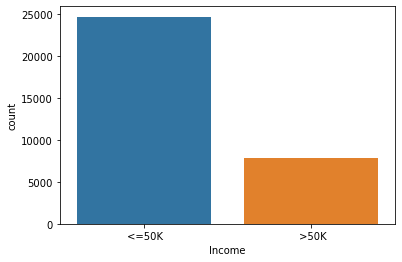

In [7]:
#plot each class frequency
sns.countplot(x='Income',data=df)
plt.show()

In [8]:
#Drop column 'Native_country' as it doesnot play a vital role in deciding outcome.
df=df.drop(['Native_country'],axis=1)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,<=50K


.There are many column that has object datatype:
Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex.                           

.So, we have to use Encoder Techniques to encode these into numeric datatype.                   

In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
#Encoding Worlclass column
ord_encoder=OrdinalEncoder(categories=[[' Self-emp-not-inc',' Private',' Self-emp-inc','local-gov',' Federal-gov',' Never-worked',' Without-pay',' Local-gov','Private',' State-gov',' ?']])
df1=ord_encoder.fit_transform(df[['Workclass']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [2.]])

In [11]:
#Encoding Education
ord_encoder=OrdinalEncoder(categories=[[' Masters',' 11th',' HS-grad',' Bachelors',' Assoc-voc',' 12th',' Doctorate',' Assoc-acdm',' 5th-6th',' Some-college',' Preschool',' Prof-school',' 10th',' 7th-8th',' 9th',' 1st-4th']])
df2=ord_encoder.fit_transform(df[['Education']])
df2

array([[3.],
       [2.],
       [1.],
       ...,
       [2.],
       [2.],
       [2.]])

In [12]:
#Encoding Marital_status
ord_encoder=OrdinalEncoder(categories=[[' Married-civ-spouse',' Divorced',' Never-married',' Married-spouse-absent',' Married-AF-spouse',' Separated',' Widowed']])
df3=ord_encoder.fit_transform(df[['Marital_status']])
df3

array([[0.],
       [1.],
       [0.],
       ...,
       [6.],
       [2.],
       [0.]])

In [13]:
#Encoding Occupation
ord_encoder=OrdinalEncoder(categories=[[' Exec-managerial',' Handlers-cleaners',' Prof-specialty',' Tech-support',' Machine-op-inspct',' Adm-clerical',' Craft-repair',' Transport-moving',' Sales',' ?',' Other-service',' Farming-fishing',' Protective-serv',' Priv-house-serv',' Armed-Forces']])
df4=ord_encoder.fit_transform(df[['Occupation']])
df4

array([[0.],
       [1.],
       [1.],
       ...,
       [5.],
       [5.],
       [0.]])

In [14]:
#Encoding Race
ord_encoder=OrdinalEncoder(categories=[[' White',' Black',' Other',' Amer-Indian-Eskimo',' Asian-Pac-Islander']])
df6=ord_encoder.fit_transform(df[['Race']])
df6

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [15]:
#Encoding Relationship
ord_encoder=OrdinalEncoder(categories=[[' Husband',' Not-in-family',' Wife',' Unmarried',' Own-child',' Other-relative']])
df5=ord_encoder.fit_transform(df[['Relationship']])
df5

array([[0.],
       [1.],
       [0.],
       ...,
       [3.],
       [4.],
       [2.]])

In [16]:
#Encoding Sex
ord_encoder=OrdinalEncoder(categories=[[' Male',' Female']])
df7=ord_encoder.fit_transform(df[['Sex']])
df7

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]])

In [17]:
#Overriding these column value with codes in Dataset.                  
df['Workclass']=df1
df['Education']=df2
df['Marital_status']=df3
df['Occupation']=df4
df['Relationship']=df5
df['Race']=df6
df['Sex']=df7
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,0.0,83311,3.0,13,0.0,0.0,0.0,0.0,0.0,0,0,13,<=50K
1,38,1.0,215646,2.0,9,1.0,1.0,1.0,0.0,0.0,0,0,40,<=50K
2,53,1.0,234721,1.0,7,0.0,1.0,0.0,1.0,0.0,0,0,40,<=50K
3,28,1.0,338409,3.0,13,0.0,2.0,2.0,1.0,1.0,0,0,40,<=50K
4,37,1.0,284582,0.0,14,0.0,0.0,2.0,0.0,1.0,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,1.0,257302,7.0,12,0.0,3.0,2.0,0.0,1.0,0,0,38,<=50K
32556,40,1.0,154374,2.0,9,0.0,4.0,0.0,0.0,0.0,0,0,40,>50K
32557,58,1.0,151910,2.0,9,6.0,5.0,3.0,0.0,1.0,0,0,40,<=50K
32558,22,1.0,201490,2.0,9,2.0,5.0,4.0,0.0,0.0,0,0,20,<=50K


.Now all the column having datatype 'object' gets encoded into 'numeric' datatype.Now we can proceed  further.             

.Now using SelectKBest feature Selection Method to select best features .                                 

In [18]:
#SelectKBest use f_classif fuction to find best features, where f_classif uses ANOVA test.                   
from sklearn.feature_selection import SelectKBest,f_classif

In [20]:
#Replace Label column(Income) into binary codes
df['Income']=df['Income'].replace({'<=50k':0,'>50k':1})

In [21]:
x=df.drop('Income',axis=1)
y=df.Income

In [25]:
best_features=SelectKBest(score_func=f_classif,k=10)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

#Concatnate dataframes
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','score']

#name output columns
print(feature_scores.nlargest(10,'score'))

      Feature_Name        score
7     Relationship  4614.430875
5   Marital_status  4188.037527
4    Education_num  4120.741694
0              Age  1886.677918
6       Occupation  1855.144128
12  Hours_per_week  1813.339094
10    Capital_gain  1709.157677
9              Sex  1593.288816
11    Capital_loss   754.777449
3        Education   210.013524


In [26]:
#Model Building
new_x=df[['Relationship','Marital_status','Education_num','Age','Occupation','Hours_per_week','Capital_gain','Sex','Capital_loss','Education']]

In [27]:
new_x

,Relationship,Marital_status,Education_num,Age,Occupation,Hours_per_week,Capital_gain,Sex,Capital_loss,Education
0,0.0,0.0,13,50,0.0,13,0,0.0,0,3.0
1,1.0,1.0,9,38,1.0,40,0,0.0,0,2.0
2,0.0,0.0,7,53,1.0,40,0,0.0,0,1.0
3,2.0,0.0,13,28,2.0,40,0,1.0,0,3.0
4,2.0,0.0,14,37,0.0,40,0,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
32555,2.0,0.0,12,27,3.0,38,0,1.0,0,7.0
32556,0.0,0.0,9,40,4.0,40,0,0.0,0,2.0
32557,3.0,6.0,9,58,5.0,40,0,1.0,0,2.0
32558,4.0,2.0,9,22,5.0,20,0,0.0,0,2.0


In [28]:
#Data Scaling
scaler=StandardScaler()
x_scaler=scaler.fit_transform(new_x)

In [29]:
#Building models to test unexposed data
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=300)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [30]:
#confusion matrix
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[5660,  593],
       [ 762, 1125]], dtype=int64)

In [31]:
#Classification Report
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      6253
        >50K       0.65      0.60      0.62      1887

    accuracy                           0.83      8140
   macro avg       0.77      0.75      0.76      8140
weighted avg       0.83      0.83      0.83      8140



.Without removing outliers ,models fit 83% of data.                              

In [32]:
#Checking wheather the model is overfitted or not
from sklearn.model_selection import cross_val_score

In [33]:
cross_val_score(knn,x_scaler,y,cv=5)

array([0.82862408, 0.83123464, 0.83599509, 0.83614865, 0.8355344 ])

In [34]:
cross_val_score(KNeighborsClassifier(),x_scaler,y,cv=5).mean()

0.8335073710073709

.As the model earlier value is approx same as this value, so model is not overfited.                     

In [39]:
#we want to remove outliers from selected 10 features
df_features=df.drop(columns=['Income','Workclass','Fnlwgt','Race'],axis=1)
df_features

,Age,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week
0,50,3.0,13,0.0,0.0,0.0,0.0,0,0,13
1,38,2.0,9,1.0,1.0,1.0,0.0,0,0,40
2,53,1.0,7,0.0,1.0,0.0,0.0,0,0,40
3,28,3.0,13,0.0,2.0,2.0,1.0,0,0,40
4,37,0.0,14,0.0,0.0,2.0,1.0,0,0,40
...,...,...,...,...,...,...,...,...,...,...
32555,27,7.0,12,0.0,3.0,2.0,1.0,0,0,38
32556,40,2.0,9,0.0,4.0,0.0,0.0,0,0,40
32557,58,2.0,9,6.0,5.0,3.0,1.0,0,0,40
32558,22,2.0,9,2.0,5.0,4.0,0.0,0,0,20


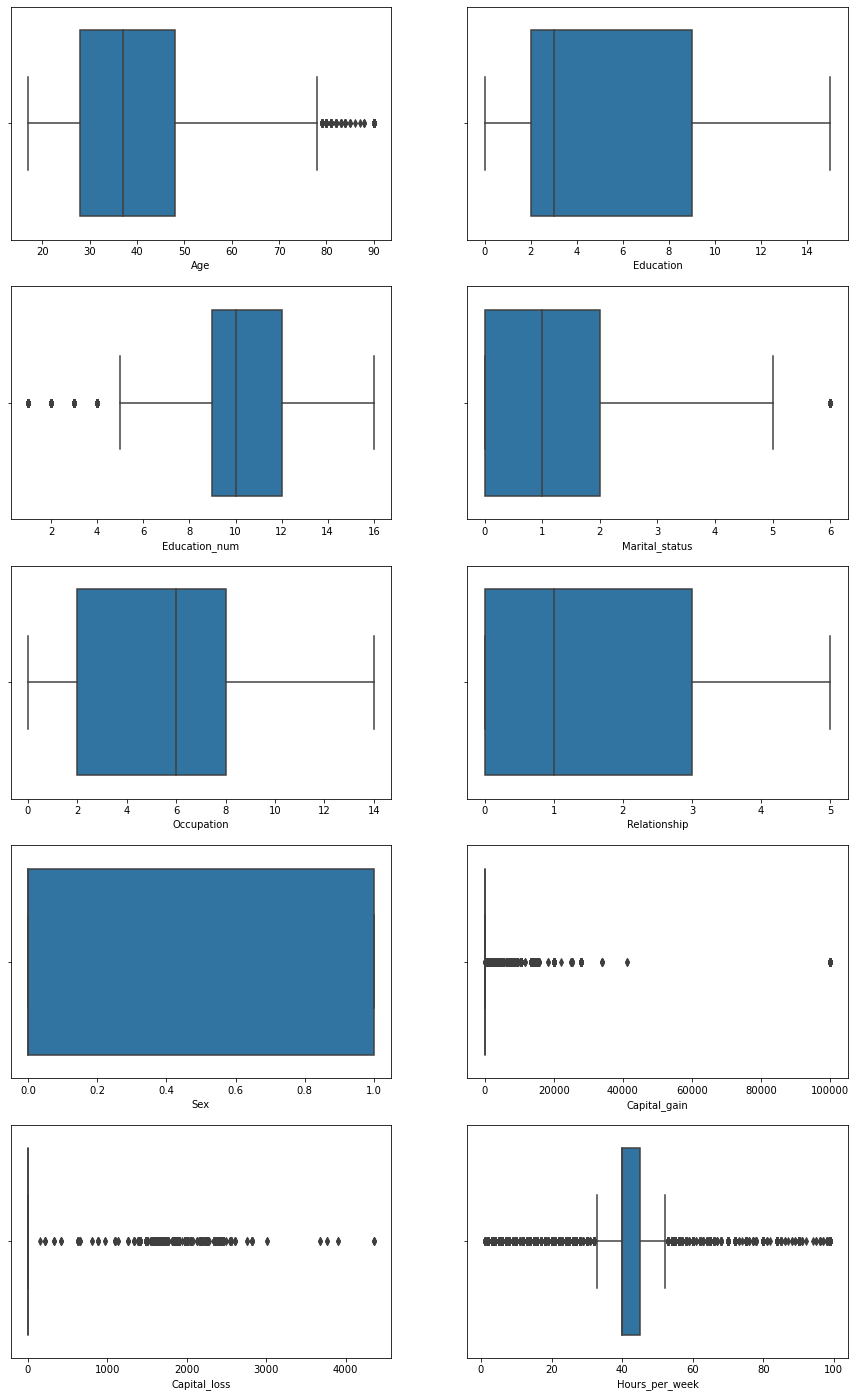

In [40]:
#Detecting the outliers using boxplot
plt.figure(figsize=(15,30))
graph=1

for column in df_features:
    if graph <=12:
        ax=plt.subplot(6,2,graph)
        sns.boxplot(df_features[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()    

#Outliers present in these columns :
----Higher outliers present in Age,Marital_status,Capital_gain,Capital_loss and Hours_per_week.                      
-----Lowers outliers is also present in Education_num and Hours_per_week.                      

In [41]:
#Finding IQR  to identify outliers

#1st Quantile
q1=df.quantile(0.25)

#3rd Quantile
q3=df.quantile(0.75)

#IQR
iqr=q3-q1

In [45]:
#Outliers removing Higher Side 
#Removing from Age
index=np.where(df['Age']>(q3.Age+(1.5*iqr.Age)))
df=df.drop(df.index[index])
df.reset_index(drop=True)

#Removing Marital_status
index=np.where(df['Marital_status']>(q3.Marital_status+(1.5*iqr.Marital_status)))
df=df.drop(df.index[index])
df.reset_index(drop=True)


#Removing from Capital_gain
index=np.where(df['Capital_gain']>(q3.Capital_gain+(1.5*iqr.Capital_gain)))
df=df.drop(df.index[index])
df.reset_index(drop=True)

#Removing from Capital_loss
index=np.where(df['Capital_loss']>(q3.Capital_loss+(1.5*iqr.Capital_loss)))
df=df.drop(df.index[index])
df.reset_index(drop=True)

#Removing from Hours_per_week
index=np.where(df['Hours_per_week']>(q3.Hours_per_week+(1.5*iqr.Hours_per_week)))
df=df.drop(df.index[index])
df.reset_index(drop=True)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,38,1.0,215646,2.0,9,1.0,1.0,1.0,0.0,0.0,0,0,40,<=50K
1,28,1.0,338409,3.0,13,0.0,2.0,2.0,1.0,1.0,0,0,40,<=50K
2,37,1.0,284582,0.0,14,0.0,0.0,2.0,0.0,1.0,0,0,40,<=50K
3,52,0.0,209642,2.0,9,0.0,0.0,0.0,0.0,0.0,0,0,45,>50K
4,30,9.0,141297,3.0,13,0.0,2.0,0.0,4.0,0.0,0,0,40,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16424,43,1.0,84661,4.0,11,0.0,8.0,0.0,0.0,0.0,0,0,45,<=50K
16425,53,1.0,321865,0.0,14,0.0,0.0,0.0,0.0,0.0,0,0,40,>50K
16426,22,1.0,310152,9.0,10,2.0,12.0,1.0,0.0,0.0,0,0,40,<=50K
16427,27,1.0,257302,7.0,12,0.0,3.0,2.0,0.0,1.0,0,0,38,<=50K


In [44]:
#Removing outliers from Lower Side
#Removing from Eduaction_num
index=np.where(df['Education_num']<(q3.Education_num-(1.5*iqr.Education_num)))
df=df.drop(df.index[index])
df.reset_index(drop=True)

#Removing from Hours_per_week
index=np.where(df['Hours_per_week']<(q3.Hours_per_week-(1.5*iqr.Hours_per_week)))
df=df.drop(df.index[index])
df.reset_index(drop=True)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,38,1.0,215646,2.0,9,1.0,1.0,1.0,0.0,0.0,0,0,40,<=50K
1,28,1.0,338409,3.0,13,0.0,2.0,2.0,1.0,1.0,0,0,40,<=50K
2,37,1.0,284582,0.0,14,0.0,0.0,2.0,0.0,1.0,0,0,40,<=50K
3,52,0.0,209642,2.0,9,0.0,0.0,0.0,0.0,0.0,0,0,45,>50K
4,30,9.0,141297,3.0,13,0.0,2.0,0.0,4.0,0.0,0,0,40,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16424,43,1.0,84661,4.0,11,0.0,8.0,0.0,0.0,0.0,0,0,45,<=50K
16425,53,1.0,321865,0.0,14,0.0,0.0,0.0,0.0,0.0,0,0,40,>50K
16426,22,1.0,310152,9.0,10,2.0,12.0,1.0,0.0,0.0,0,0,40,<=50K
16427,27,1.0,257302,7.0,12,0.0,3.0,2.0,0.0,1.0,0,0,38,<=50K


In [48]:
print(df.shape)

(16429, 14)


In [50]:
#Checking wheather it imporove the accurracy of dataset
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=340)
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [51]:
#confusion matrix
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[5597,  564],
       [ 766, 1213]], dtype=int64)

In [52]:
#Classification Report
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      6161
        >50K       0.68      0.61      0.65      1979

    accuracy                           0.84      8140
   macro avg       0.78      0.76      0.77      8140
weighted avg       0.83      0.84      0.83      8140



.It improve the accuracy with 84 %.                           

In [53]:
#HYpperparameter Tunning
#Using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid={'algorithm':['kd-tree','brute'],
            'leaf_size':[15,18,20,22],
             'n_neighbors':[3,5,7,9,13]
           }

In [56]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)

In [57]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd-tree', 'brute'],
                         'leaf_size': [15, 18, 20, 22],
                         'n_neighbors': [3, 5, 7, 9, 13]})

In [58]:
gridsearch.best_params_

{'algorithm': 'brute', 'leaf_size': 15, 'n_neighbors': 13}

In [60]:
#We will use best parameters in our KNN algorithms and check if accuracy is increasing
knn=KNeighborsClassifier(algorithm='brute',leaf_size=15,n_neighbors=13)

In [61]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=15, n_neighbors=13)

In [62]:
y_pred=knn.predict(x_test)

In [63]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[5657,  504],
       [ 770, 1209]], dtype=int64)

In [64]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      6161
        >50K       0.71      0.61      0.65      1979

    accuracy                           0.84      8140
   macro avg       0.79      0.76      0.78      8140
weighted avg       0.84      0.84      0.84      8140



.This is the best accuracy through knn model.               

In [65]:
#Checking accuracy  using LogisticRegression Method
from sklearn.linear_model import LogisticRegression

In [66]:
#splitting into train test data
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=355)

In [67]:
log_reg=LogisticRegression()

In [69]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [70]:
#predicting
y_pred=log_reg.predict(x_test)

In [73]:
#Checking accuracy
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8386977886977887

In [75]:
#Saving the model
import pickle
with open('modelForPrediction.sav','wb') as f:
    pickle.dump(knn,f)

.We check tyhe accuracy of dataset by using knn and logistic regression model,In which i got 84 % in knn . so we use knn for prediction.           